In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

MostRecentDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
MostRecentDate

('2017-08-23',)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
MostRecentDate = dt.date(2017,8,23)


# Calculate the date one year from the last date in data set.
OneYearDate = MostRecentDate - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
Query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= OneYearDate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
QueryResult = pd.DataFrame(Query, columns=['Date', 'Precipitation'])
        #index
QueryResult.set_index('Date', inplace=True)

# Sort the dataframe by date
QueryResult = QueryResult.sort_index()
#Show
QueryResult





,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


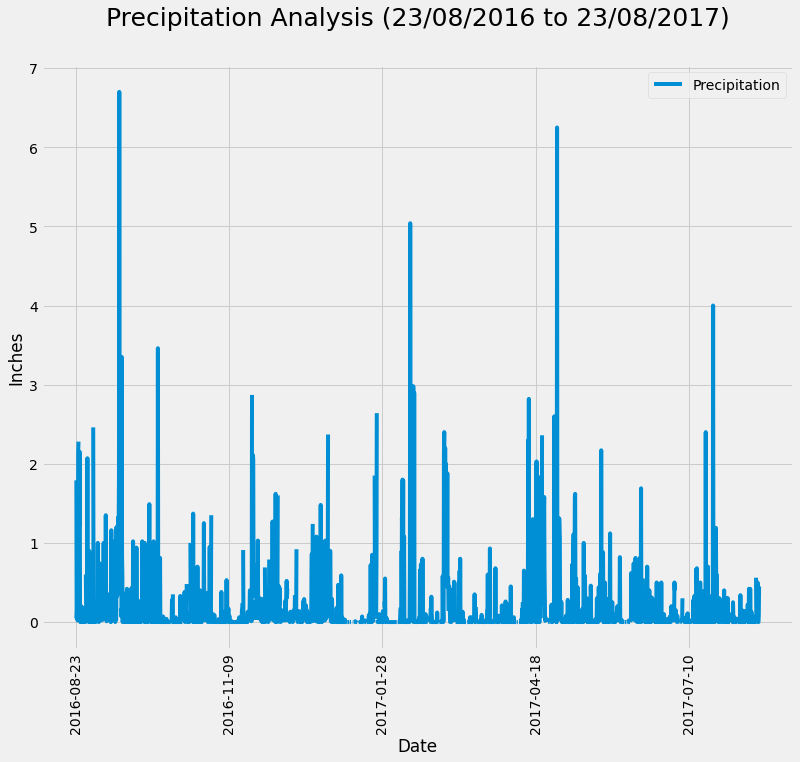

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
QueryResult.plot(rot = 90, figsize = (12,10))
    #Title
plt.title('Precipitation Analysis (23/08/2016 to 23/08/2017)', fontsize=25, pad=40)
    #labels
plt.xlabel('Date')
plt.ylabel('Inches')
    #show
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
QueryResult.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
TotalStations = len(session.query(Station).all())
#Print
TotalStations

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

MostActiveStations = session.query(Measurement.station, func.count(Measurement.id)).\
                  group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

#Print
MostActiveStations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Most active station is USC00519281

TemperatureQ = [Measurement.station, 
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

StationTemperature = session.query(*TemperatureQ).filter_by(station = 'USC00519281').all()

#Display
StationTemperature


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [40]:
#label display and placed in dataframe

StationTemperatureDF = pd.DataFrame(StationTemperature, columns=['Station', 'Lowest Temperature', 
                                                          'Highest Temperature', 'Average Temperature'])

#Show
StationTemperatureDF

,Station,Lowest Temperature,Highest Temperature,Average Temperature
0,USC00519281,54.0,85.0,71.663781


In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Creating Query
StationYearQuery = session.query(Measurement.date, Measurement.tobs).filter_by(station = 'USC00519281').\
                      filter(Measurement.date >= OneYearDate).all() 

#Creating the dataframe
StationYearQueryDF = pd.DataFrame(StationYearQuery)

#Show
StationYearQueryDF


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


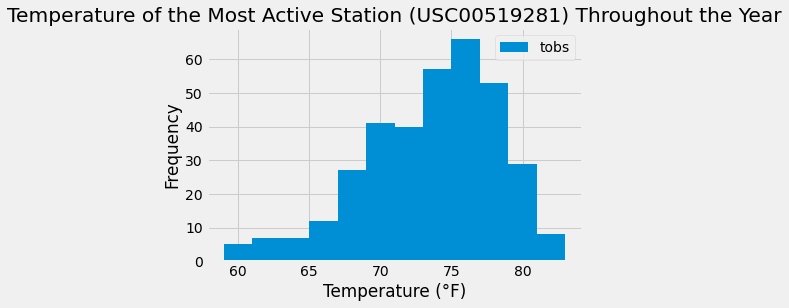

In [49]:
#Creating the histogram
StationYearQueryDF.plot(kind = 'hist', bins = 12)

#title
plt.title(f'Temperature of the Most Active Station (USC00519281) Throughout the Year')

#Labels
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

#Show
plt.show()

# Close session

In [50]:
# Close Session
session.close()